In [155]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import nltk
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
documents = pd.read_csv('../DATA/documents_V1.1.csv')

In [4]:
documents

,INDEX,LINK,DOCUMENT
0,A107-21,https://www.corteconstitucional.gov.co/Relator...,auto 10721\n \n \nreferencia: expediente t-7.9...
1,A106-21,https://www.corteconstitucional.gov.co/Relator...,auto 10621\n \n \nreferencia: expediente t-6.8...
2,A092-21,https://www.corteconstitucional.gov.co/Relator...,auto 09221\n \n \nreferencia: respuesta a la s...
3,A091-21,https://www.corteconstitucional.gov.co/Relator...,auto 09121\n \n \nreferencia: requerimiento al...
4,A090-21,https://www.corteconstitucional.gov.co/Relator...,auto 09021\n \n \nreferencia: expediente t- 7....
...,...,...,...
34472,C-417-92,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia no. c-4179...
34473,C-416-92,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia no.\r\nc-4...
34474,C-221-92,https://www.corteconstitucional.gov.co/Relator...,sentencia de constitucionalidad de mayo 92\n\r...
34475,C-005-92,https://www.corteconstitucional.gov.co/Relator...,\nsentencia no.\r\nc-00592\n \n emergencia...


In [14]:
documents['INDEX'] = documents['INDEX'].str.upper()

In [15]:
documents["DOCUMENT_TYPE"] = [x.strip()[0] for x in documents.INDEX]

In [7]:
documents.columns.tolist()

['INDEX', 'LINK', 'DOCUMENT', 'DOCUMENT_TYPE']

In [16]:
documents = documents[['INDEX','DOCUMENT_TYPE', 'LINK', 'DOCUMENT']]

In [17]:
documents.DOCUMENT_TYPE.value_counts()

T    18804
A     8739
C     6543
S      391
Name: DOCUMENT_TYPE, dtype: int64

Text(0, 0.5, 'Conteo')

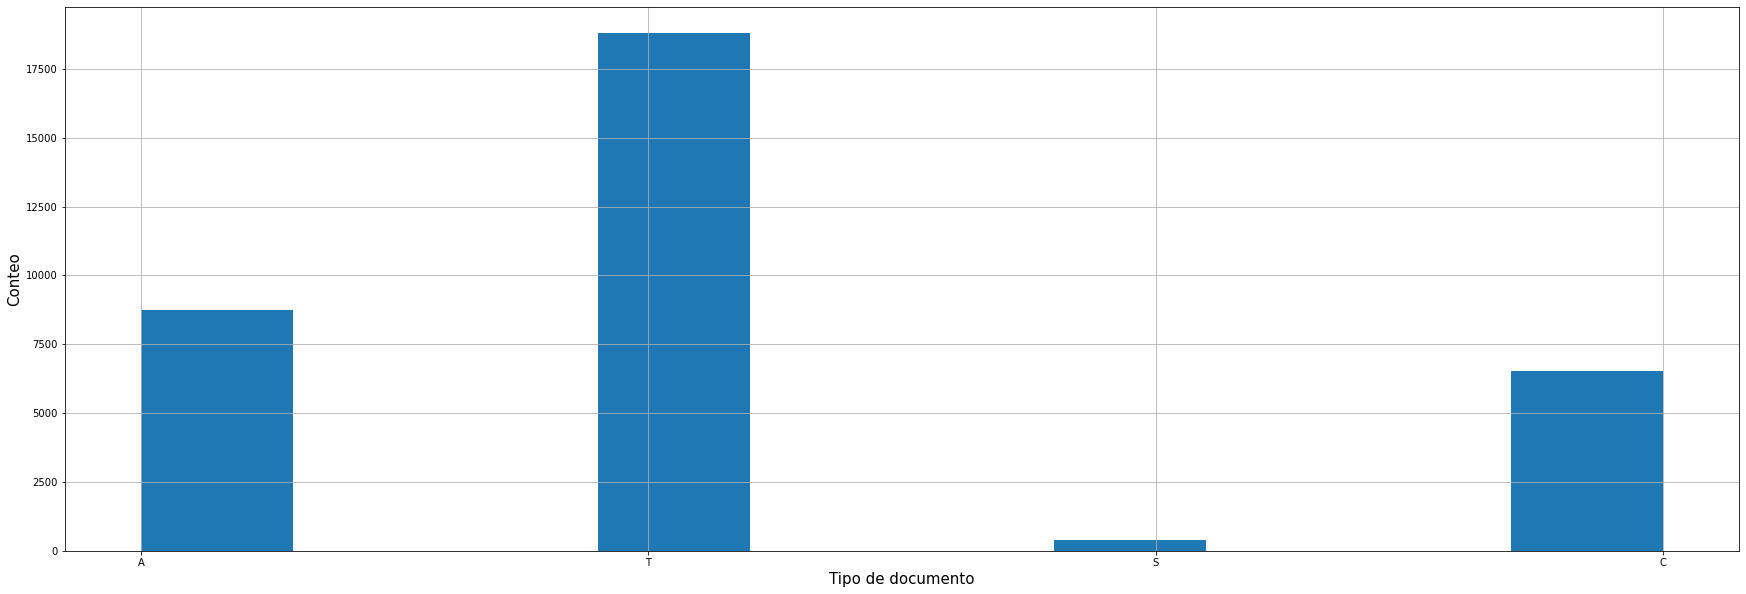

In [19]:
plt.figure(figsize=(30, 10))
documents['DOCUMENT_TYPE'].hist()
plt.xlabel("Tipo de documento", fontsize=15)
plt.ylabel("Conteo",fontsize=15)

In [112]:
def preprocessor_sentences(text):
    """
    preprocesador de texto con separación de frases por línea.
    """
    
    text = text.replace("\n", " ")
    text = text.replace("\xa0", "")
    text = text.replace("\x93", "")
    text = text.replace("\x94", "")
    text = text.replace("\r", "")
    text = text.replace("  ", " ")
    text = text.replace("   ", " ")
    text = text.replace("    ", " ")
    text = text.replace("     ", " ")
    text = text.replace("      ", " ")
    text = re.sub("\[([\s\S]*?)\]", "", text)
    
    return text

In [110]:
documents["DOCUMENT_WITH_SIGNS"] = [preprocessor_sentences(str(x)) for x in tqdm(documents.DOCUMENT)]


100%|██████████| 34477/34477 [00:34<00:00, 1010.88it/s]


In [146]:
def preprocessor_sentences_clean(text):
    """
    preprocesador de texto con separación de frases por línea.
    """
    
    text = text.replace("\n", " ")
    text = text.replace("\r", "")
    
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~.='''
    for char in punctuations:
        text = text.replace(char, " ")
    
    
    text = text.replace("  ", " ")
    text = text.replace("   ", " ")
    text = text.replace("    ", " ")
    text = text.replace("     ", " ")
    text = text.replace("      ", " ")
    text = text.replace("       ", " ")
    
    return text

In [147]:
documents["DOCUMENT_CLEAN"] = [preprocessor_sentences_clean(str(x)) for x in tqdm(documents.DOCUMENT_WITH_SIGNS)]


100%|██████████| 34477/34477 [00:32<00:00, 1058.22it/s]


In [149]:
documents

,INDEX,DOCUMENT_TYPE,LINK,DOCUMENT,DOCUMENT_WITH_SIGNS,DOCUMENT_CLEAN
0,A107-21,A,https://www.corteconstitucional.gov.co/Relator...,auto 10721\n \n \nreferencia: expediente t-7.9...,auto 10721 referencia: expediente t-7.909.170...,auto 10721 referencia expediente t 7 909 170 a...
1,A106-21,A,https://www.corteconstitucional.gov.co/Relator...,auto 10621\n \n \nreferencia: expediente t-6.8...,auto 10621 referencia: expediente t-6.839.494...,auto 10621 referencia expediente t 6 839 494 a...
2,A092-21,A,https://www.corteconstitucional.gov.co/Relator...,auto 09221\n \n \nreferencia: respuesta a la s...,auto 09221 referencia: respuesta a la solicit...,auto 09221 referencia respuesta a la solicitud...
3,A091-21,A,https://www.corteconstitucional.gov.co/Relator...,auto 09121\n \n \nreferencia: requerimiento al...,auto 09121 referencia: requerimiento al minis...,auto 09121 referencia requerimiento al ministr...
4,A090-21,A,https://www.corteconstitucional.gov.co/Relator...,auto 09021\n \n \nreferencia: expediente t- 7....,auto 09021 referencia: expediente t- 7.185.42...,auto 09021 referencia expediente t 7 185 421 a...
...,...,...,...,...,...,...
34472,C-417-92,C,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia no. c-4179...,sentencia no sentencia no. c-41792 transito c...,sentencia no sentencia no c 41792 transito con...
34473,C-416-92,C,https://www.corteconstitucional.gov.co/Relator...,sentencia no\n\r\n\r\n\n\nsentencia no.\r\nc-4...,sentencia no sentencia no. c-41692 transito co...,sentencia no sentencia no c 41692 transito con...
34474,C-221-92,C,https://www.corteconstitucional.gov.co/Relator...,sentencia de constitucionalidad de mayo 92\n\r...,sentencia de constitucionalidad de mayo 92 sen...,sentencia de constitucionalidad de mayo 92 sen...
34475,C-005-92,C,https://www.corteconstitucional.gov.co/Relator...,\nsentencia no.\r\nc-00592\n \n emergencia...,sentencia no. c-00592 emergencia socialdecre...,sentencia no c 00592 emergencia socialdecreto...


In [157]:
with open("corpus.txt", "w",encoding="utf-8") as file:
    for doc in tqdm(documents.DOCUMENT_CLEAN):
        file.write(doc)
        file.write(" ")


100%|██████████| 34477/34477 [00:06<00:00, 5414.10it/s]


In [158]:
file_name = 'documents_V1_2.csv'
documents.to_csv(file_name, encoding='utf-8', index= False)